# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1304 Чернякова Александра. Вариант №24.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод "SX"
1. Необходимо записать степень в бинарном виде
2. В бинарной записи отбросить старший бит
3. Заменить двоичную запись на "SX"-последовательность: 1 заменяется на "SX", 0 заменяется на "S".
4. Теперь "S" - это возведение в квадрат, "X" - умножение на x

### Бинарный метод возведения в степень справа налево
1. Инициализация начальными значениями: N = n (степень), Y = 1, Z = x
2. Далее идет проверка на четность N:
3. Если N - четное, то N делится на 2 и округляется вниз, Z = Z * Z и снова повторяется пункт 2
4. Если N - нечетное, то N делится на 2 и округляется вниз, Y = Z * Y и происходит проверка на равенство N нулю:
5. Если N = 0, то возвращается Y и алгоритм завершает работу
6. Если N != 0, то  Z = Z * Z и снова повторяется пункт 2

### Метод множителей
1. Представляем n в виде произведения p и q, где p - наименьший простой делитель, а q не меньше 1. То есть x в степени n можно найти вычислив x в степени p, а затем возведя эту величину в степень q.
2. Если n - простое число, то можно сначала вычислить x в степени n-1, а затем умножить его на x.
3. При n = 1 получаем x , безо всяких вычислений.

### Дерево степеней
1. Пусть построен k-ый уровень деерва и необходимо построить (k+1)-ый уровень дерева.
2. Берем каждый узел n на k-ом уровне слева направо и присоединяем к нему снизу узлы
3. Порядок присоединения важен.
4. Если какой-то узел уже появился ранее в дереве, то он устраняется.

Дерево степеней, бинарный метод SX, бинарный метод R-L и метод множителей являются алгоритмами для быстрого возведения в степень. Они используются для того, чтобы минимизировать количество умножений, необходимых для возведения числа в степень.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод "SX"

Реализация бинарного метода "SX" с подробными комментариями представлена ниже:

In [1]:
def func_sx():
    n = int(input())  # считывание степени x
    bin_number = bin(n)  # представление степени в бинарном виде
    bin_number = bin_number[3::]  # отбрасывание символов '0b', которые обозначают бинарный вид, и старшего бита
    print("Binary: ", bin_number) # итоговый бинарный вид
    sx_number = '' # заменяем бинарный вид в SX-вид (изначально пустая строка)
    for i in range(len(bin_number)):  # заменяем 1 на SX, а 0 на S
        sx_number += 'SX' if bin_number[i] == '1' else 'S'
    print("SX: ", sx_number) # итоговая SX-последовательность
    print("")
    deg = 1 # начальная степень x
    iterations = 0 # количество итераций
    print(x**1, end = ' ')  # вывод x до начала итераций
    for i in range(len(sx_number)): # обход всей "SX"-последовательности
        iterations += 1  # увеличение количества итераций на 1
        deg = deg+deg if sx_number[i] == 'S' else deg+1 # если "S", то возводим в квадрат, если "X", то умножаем на x
        print(x**deg, end = ' ') # вывод после каждой итерации
    print('\nTotal number of iterations:', iterations) # вывод итогового количества итераций

### Бинарный метод возведения в степень справа налево
Реализация метода с подробными комментариями представлена ниже:

In [2]:
!pip install prettytable # установка библиотеки

In [3]:
from prettytable import PrettyTable  # импортировние модуля таблицы для наглядного вывода
def bin_func_r_l():
    N = int(input())  # считывание степени x
    # инициализаия
    Y = 1
    Z = x
    i = 0 # счетчик столбцов таблицы
    iterations = 0 # количество итераций
    t = PrettyTable() # создание таблицы
    t.field_names = ["№ итерации", "Значение N", "Значение Y", "Значение Z"] # заголовки кадого столбца таблицы
    t.add_row([i, N, Y, Z]) # добавление первой строки с инициализорованными начальными значениями i, N, Y, Z
    i += 1 # счетчик увеличивается на 1, так как первая строка таблицы заполнена
    while True:
        if N%2 == 0: # если N - четное
            N = floor(N/2)
            Z = Z * Z
            iterations += 1 # увеличение количества итераций на 1
        else: # если N - нечетное
            N = floor(N/2)
            Y = Z * Y
            iterations += 1 # увеличение количества итераций на 1
            if N != 0: # если N != 0
                Z = Z * Z
                iterations += 1 # увеличение количества итераций на 1
            else: # если N = 0, то найдено Y и цикл заканчивает работу
                t.add_row([i, N, Y, Z]) # добавление последней строки таблицы
                break # выход из цикла
        t.add_row([i, N, Y, Z]) # добавление строки таблицы после каждого обхода цикла
        i += 1 # увеличение счетчика на 1
    print(t.get_string()) # вывод таблицы
    print('Total number of iterations:', iterations) # вывод итогового количества итераций

Сравним два метода:

In [4]:
func_sx()

7
Binary:  11
SX:  SXSX

x x^2 x^3 x^6 x^7 
Total number of iterations: 4


In [5]:
bin_func_r_l()

7
+------------+------------+------------+------------+
| № итерации | Значение N | Значение Y | Значение Z |
+------------+------------+------------+------------+
|     0      |     7      |     1      |     x      |
|     1      |     3      |     x      |    x^2     |
|     2      |     1      |    x^3     |    x^4     |
|     3      |     0      |    x^7     |    x^4     |
+------------+------------+------------+------------+
Total number of iterations: 5


In [6]:
func_sx()

23
Binary:  0111
SX:  SSXSXSX

x x^2 x^4 x^5 x^10 x^11 x^22 x^23 
Total number of iterations: 7


In [7]:
bin_func_r_l()

23
+------------+------------+------------+------------+
| № итерации | Значение N | Значение Y | Значение Z |
+------------+------------+------------+------------+
|     0      |     23     |     1      |     x      |
|     1      |     11     |     x      |    x^2     |
|     2      |     5      |    x^3     |    x^4     |
|     3      |     2      |    x^7     |    x^8     |
|     4      |     1      |    x^7     |    x^16    |
|     5      |     0      |    x^23    |    x^16    |
+------------+------------+------------+------------+
Total number of iterations: 8


In [8]:
func_sx()

33
Binary:  00001
SX:  SSSSSX

x x^2 x^4 x^8 x^16 x^32 x^33 
Total number of iterations: 6


In [9]:
bin_func_r_l()

33
+------------+------------+------------+------------+
| № итерации | Значение N | Значение Y | Значение Z |
+------------+------------+------------+------------+
|     0      |     33     |     1      |     x      |
|     1      |     16     |     x      |    x^2     |
|     2      |     8      |     x      |    x^4     |
|     3      |     4      |     x      |    x^8     |
|     4      |     2      |     x      |    x^16    |
|     5      |     1      |     x      |    x^32    |
|     6      |     0      |    x^33    |    x^32    |
+------------+------------+------------+------------+
Total number of iterations: 7


In [10]:
func_sx()

123456789
Binary:  11010110111100110100010101
SX:  SXSXSSXSSXSXSSXSXSXSXSSSXSXSSXSSSSXSSXSSX

x x^2 x^3 x^6 x^7 x^14 x^28 x^29 x^58 x^116 x^117 x^234 x^235 x^470 x^940 x^941 x^1882 x^1883 x^3766 x^3767 x^7534 x^7535 x^15070 x^30140 x^60280 x^60281 x^120562 x^120563 x^241126 x^482252 x^482253 x^964506 x^1929012 x^3858024 x^7716048 x^7716049 x^15432098 x^30864196 x^30864197 x^61728394 x^123456788 x^123456789 
Total number of iterations: 41


In [11]:
bin_func_r_l()

123456789
+------------+------------+-------------+------------+
| № итерации | Значение N |  Значение Y | Значение Z |
+------------+------------+-------------+------------+
|     0      | 123456789  |      1      |     x      |
|     1      |  61728394  |      x      |    x^2     |
|     2      |  30864197  |      x      |    x^4     |
|     3      |  15432098  |     x^5     |    x^8     |
|     4      |  7716049   |     x^5     |    x^16    |
|     5      |  3858024   |     x^21    |    x^32    |
|     6      |  1929012   |     x^21    |    x^64    |
|     7      |   964506   |     x^21    |   x^128    |
|     8      |   482253   |     x^21    |   x^256    |
|     9      |   241126   |    x^277    |   x^512    |
|     10     |   120563   |    x^277    |   x^1024   |
|     11     |   60281    |    x^1301   |   x^2048   |
|     12     |   30140    |    x^3349   |   x^4096   |
|     13     |   15070    |    x^3349   |   x^8192   |
|     14     |    7535    |    x^3349   |  x^16384   |


Бинарный метод "SX" и метод возведения в степень справа-налево (R-L) являются двумя разными алгоритмами для быстрого возведения в степень числа, используя меньшее количество операций умножения, чем обычный подход, при котором число умножается на себя столько раз, сколько равно показателю степени.

Однако бинарный метод "SX" обычно более эффективен и быстрее, чем метод R-L, потому что он использует двоичное представление, что ускоряет операции сдвига вправо и умножения. Метод R-L, с другой стороны, может быть более понятен и проще в реализации, но он обычно требует большего количества операций умножения: разница в количестве итераций представлена на числах 7, 23, 33, 123456789 (в кажом из примеров бинарный метод "SX" использовал меньшее количество итераций)

Таким образом, если необходимо быстро вычислить степень числа, бинарный метод "SX" является более эффективным. Однако для небольших значений показателя степени, метод R-L может быть также достаточно эффективным.

### Метод множителей
Реализация метода с подробными комментариями представлена ниже:

In [12]:
def func_multiplier():
    n = int(input())  # считывание степени x
    print('Total number of iterations:', rec_func_multiplier(n)) # вывод итогового количества итераций
    
def rec_func_multiplier(n):
    # рассмотрение частных случаев при n = 1, 2, 3, 4
    if n == 1:
        return 0
    elif n == 2:
        return 1
    elif n==3 or n ==4:
        return 2
    elif is_prime(n): # если n - не частный случай и простое число, то нужно вычислить x^(n-1) и умножить на x^1
        # степени x это переменные p и q
        p =  n - 1
        q = 1
        iterations = 1 + rec_func_multiplier(p) + rec_func_multiplier(q) # рекурсивно вызываем функцию для каждого 
                                                                         # множителя и прибавляем 1 так как за итерацию 
                                                                         # считается и само произведение множителей
    else: # если n - не частный случай и не простое число
        f = factor(n) # раскладываем число на простые множители
        p = f[0][0] # наименьший простой множитель n
        q = n // p
        iterations = rec_func_multiplier(p) + rec_func_multiplier(q) # рекурсивно вызываем функцию для каждого множителя
    return iterations

In [13]:
func_multiplier()

7
Total number of iterations: 4


In [14]:
func_multiplier()

23
Total number of iterations: 7


In [15]:
func_multiplier()

33
Total number of iterations: 7


In [16]:
func_multiplier()

123456789
Total number of iterations: 37


Основная идея метода множителей заключается в разложении степени на множители и последующем использовании меньших степеней для вычисления исходной степени. Это может уменьшить количество необходимых операций возведения в степень и тем самым ускорить процесс.

Можно заметить из примеров, что бинарный метод SX и метод множителей совершают одинаковое число операций на небольших числах(таких как 7 и 23), однако уже на большом числе (123456789) метод множитлей выигрывает и совершает 37 операций, а бинарный метод SX совершает 41 операцию.

С другой стороны, бинарный метод "SX" является более простыми алгоритмом, но он может быть неэффективными для возведения в степень больших чисел. Он требуют большего количества операций и может работать медленнее в сравнении с методом множителей.

Таким образом, метод множителей является более оптимальным в случае, когда необходимо быстро вычислить степень большого числа. Однако в случае маленьких степеней бинарный метод "SX" может быть более эффективным - например, число 33; для возведения числа в данную степень бинарный метод "SX" совершает 6 итераций, а метод множителей 7.

### Дерево степеней
Реализация с подробными комментариями представлена ниже:

In [21]:
!pip install graphviz # установкуи библиотек для наглядного представления дерева степеней
!pip install nx

11


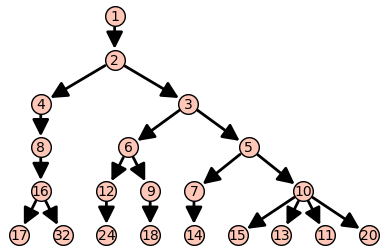

x x^2 x^3 x^5 x^10 x^11 
Total number of iterations: 5


In [98]:
# библиотеки для демонстрации графа
from sage.graphs.digraph import DiGraph
import networkx as nx
import matplotlib.pyplot as plt

# 1 - создание графа

class Node: # класс узла дерева
    def __init__(self, parent): # инициализия при создании: на вход принимается родитель, массив детей изначально пуст
        self.parent = parent
        self.children = []

    def get_parent(self): # возврат родителя
        return self.parent

    def get_children(self): # возврат списка детей
        return self.children

    def put_children(self, child): # добавление ребенка в список детей
        return self.children.append(child)

n = int(input()) # считывание степени, для которой строится дерево степеней
graph = {} # создание словаря графа вида vertex : Node() - изначально пуст
graph[1] = Node(0) # добавление в словарь первой вершины
graph.get(1).put_children(2) # добавление детей для первой вершины
graph[2] = Node(1) # добавление в словарь второй вершины
i = 2 # вершина, с которой далее будет реализовываться алгоритм для создания графа(дерева)

def func_tree(i): # функция добавления детей вершины i
    global graph
    arr_for_sum = [i] # массив для суммирования текущей вершины с предшествующими
    cur = i # запоминаем вершину, из которой идет поиск детей
    while i != 1: # пока не дойдем до начальной
        arr_for_sum.append(graph.get(i).get_parent()) # добавляем родителя вершины
        i = graph.get(i).get_parent() # родитель вершины становится текущей вершиной
    for elem in reversed(arr_for_sum): # переворачиваем список, так как поиск детей должен начинаться с меньших к большему
        if graph.get(elem + cur) is None: # если в графе нет такогй вершины
            graph[elem + cur] = Node(cur) # добавляем вершину в граф
            graph.get(cur).put_children(elem + cur) # добавляем эту вершину в список детей для cur
            

def rec_func_tree(array): # функция заполнения графа по уровням, принимает на вход массив вершин
    if n in array: # если найдена степень, то выходим из функции
        return
    for child in array: # для всех вершин данного уровня (из массива array)
        func_tree(child) # вызов функции добавления детей для каждой вершины 
    arr_level = [] # список для хранения всех детей -  получится новый уровень
    for child in array: # для каждой вершины данного уровня
        lst = graph.get(child).get_children() 
        arr_level.extend(lst) # добавление детей вершины в общий список детей
    rec_func_tree(arr_level) # рекурсивный вызов функции для нового полученного уровня

func_tree(i) # вызов функции добавления детей вершины 2
children_array = graph.get(i).get_children() # создание массива детей вершины 2
rec_func_tree(children_array) # вызов функции для построения всего графа


# 2 - демонстрация графа

graph_dict = {}
for node in graph:
    graph_dict[node] = [child for child in graph[node].get_children()]

G = DiGraph(graph_dict)
G.add_vertex(1)
pos = G.graphplot(layout='tree', tree_root=1, vertex_size=200, vertex_labels=True)
pos.show()

# 3 - вывод итогового количества итераций

# получаем массив степеней result с заданной вершины в начальную
result = [n]
while n != 1:
    n =  graph.get(n).get_parent()
    result.append(n)
    
iterations = -1 # изначально -1, так как в цикле ниже получение x посчитается за итерацию, но на самом деле с него начинаем
for deg in reversed(result): # переворачиваем массив степеней, так как он был заполнен с конца
    print(x**deg, end = ' ') # вывод после каждой итерации
    iterations += 1
print('\nTotal number of iterations:', iterations) # вывод итогового количества итераций
    

## Выводы
Ниже представлена табилица сравнения всех методов

In [101]:
table = PrettyTable() # создание таблицы для сравнения
table.field_names = ["example", "SX", "R-L", "Multiplier", "Tree"] # заголовки каждого столбца таблицы
# заполнение экспериментальных значений и их результатов для каждого рассмотренного метода
table.add_row([7, 4, 5, 4, 4]) 
table.add_row([23, 7, 8, 7, 6]) 
table.add_row([33, 6, 7, 7, 6]) 
table.add_row([123456789, 41, 42, 37, "long"]) 
print(table.get_string()) # вывод таблицы

+-----------+----+-----+------------+------+
|  example  | SX | R-L | Multiplier | Tree |
+-----------+----+-----+------------+------+
|     7     | 4  |  5  |     4      |  4   |
|     23    | 7  |  8  |     7      |  6   |
|     33    | 6  |  7  |     7      |  6   |
| 123456789 | 41 |  42 |     37     | long |
+-----------+----+-----+------------+------+


Дерево степеней, бинарный метод SX, бинарный метод R-L и метод множителей являются алгоритмами для быстрого возведения в степень. Они используются для того, чтобы минимизировать количество умножений, необходимых для возведения числа в степень.

Можно сделать вывод исходя из таблицы, что бинарный метод SX всегда превосходит бинарный метод возвведения в степень справа налево,то есть более эффективен и быстрее, чем метод R-L, потому что он использует двоичное представление, что ускоряет операции сдвига вправо и умножения. Однако для небольших значений показателя степени, метод R-L может быть также достаточно эффективным. Если сравнивать бинарный SX и метод множителей, то можно заметить, что они совершают одинаковое число операций на небольших числах(таких как 7 и 23), однако уже на большом числе (123456789) метод множителей выигрывает и совершает 37 операций, а бинарный метод SX совершает 41 операцию.
Таким образом, метод множителей является более оптимальным в случае, когда необходимо быстро вычислить степень большого числа. Однако в случае маленьких степеней бинарный метод "SX" может быть и более эффективным - например, число 33; для возведения числа в данную степень бинарный метод "SX" совершает 6 итераций, а метод множителей 7. При сравнении дерева степеней со всеми методами можно сделать вывод, что он работает также или лучше на небольших степенях: 7, 23, 33, однако на больших степенях он работет неограниченно долго и не завершает свою работу при данной релизации алгоритма (пример большого числа: 123456789).